<a href="https://colab.research.google.com/github/Ishrat16/Machine-Learning/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course no:** ETE 456

**Course name:** Neural and Fuzzy systems in communications sessional

**Submitted to:**Eftekhar Hossain

**Submitted by:**

**name:**Ishrat Jahan

**ID:** 1608023

**Level:** 04

**Term:** II

**Diabetic Dataset**

Diabetes Dataset Columns:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

# **Task:**

Accurately predict whether a patient is likely to have diabetes or not.

**Objective:**

1.To accurately predict whether a patient is likely to have diabetes or not.

2.To get familiar with different Libraries.

3.To manipulate the real world dataset.

4.Preprocessing the data before feeding into the ML models

5.To classify the problems using Deep Neural Network.

6.To develop DNN models using Tensorflow Framework

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# **Importing the Libraries**
**numpy:** NumPy stands for numeric Python, a python pacage for the computation and processing of the multi-dimensional and single-dimensional array elements.

**pandas:** Pandas provide high-performance data manipulation in python.

**matplotlib:** Matplotlib is a library used for data visualization. It is mainly used for basic plottingImporting the Libraries

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt

In [3]:
# Download the data
!wget -O diabetes.csv https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 05:00:03--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 05:00:03--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc35b1ed4eae7184a99a2e84410f.dl.dropboxusercontent.com/cd/0/inline/BcJ5mmpldN5R3aWUJ9a7KUiVEbunqJxae1PBcZOje99PqHa0OaISQcWEB6GvQjIAxsrQuhrfFILcearXCeRW3W8PEXhqewUGWxrZfIBnCSbf1oFWbgTmCH-LEFD5v95nqbrHT7mjWbmZkp3kaa0bBixY/file# [following]
--2021-12-20 05:00:04--  https://uc35b1ed4eae7184a99a2e84410f.dl.dropboxusercontent.com/cd/0/inline/BcJ5mmpldN5R3aWUJ9a7KUiVEbunqJxae1PBcZOje99PqHa0OaISQcWEB6GvQjIAxsrQuhrfFILcearXCe

# **Reading the Dataset**

pd.read_csv() function is used to read the data into a DataFrame

In [4]:
#importing the dataset

dataset_diabetes_pred = pd.read_csv('diabetes.csv')
dataset_diabetes_pred

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The shape attribute can be used to check how large the resulting DataFrame is

In [5]:
#To check the total numbers of rows and columns
dataset_diabetes_pred.shape 

(768, 9)

The dataset_diabetes_pred.columns attributes is used to return all of the columns labels of the given dataframe

In [6]:
#To check the columns in dataset
dataset_diabetes_pred.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **Klib**

In [7]:
! pip install klib

In [8]:
import klib

In [9]:
klib.corr_mat(dataset_diabetes_pred) # returns a color-encoded correlation matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


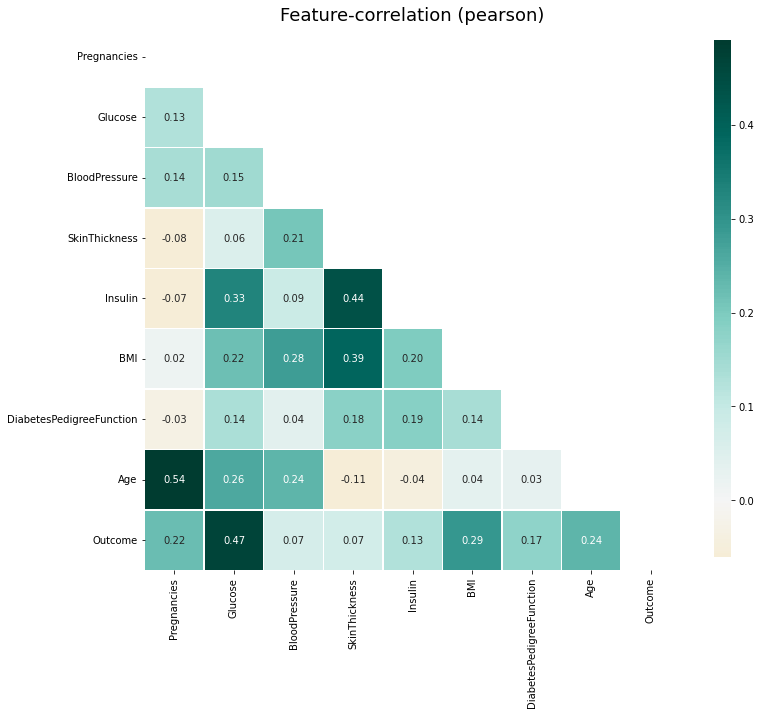

In [10]:
klib.corr_plot(dataset_diabetes_pred)

The data have been splited into independent & dependent variable.Independent are those that we are going to used for prediction or are the features. Dependent are those that we have to predict

In [ ]:
#To split data into features and target
features = dataset_diabetes_pred[['Pregnancies'	,'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # for independent
target = dataset_diabetes_pred[['Outcome']]   # for dependent
#Feature are those variable which are used for prediction and Target is the variable that we need to predict.

In [ ]:
#To show feature datas
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
#To show target data
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# **To check if there is any missing data**

As the DataFrame contains no missing data there is no need to take care of missing data

In [ ]:
#To check missing data in the columns
#To check if there is any NaN value in the column
pd.isnull(dataset_diabetes_pred.sum)

False

# **Splitting The Dataset**

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. By default Sklearn train_test_split will make random partition for the two subsets. Here train_test_split is used to split the data in 80:20 ratio i.e. 80% of the data will be used for training the model while 20% will be used for testing the model.

Parameters:

**X,y:** X is data features and Y is target

**test_size:** This is set 0.2 thus defining the test size will be 20% of the dataset.

**random_state:** it controls the shuffling applied to the data before applying the split. Setting random_state a fixed value will gurantee that the same sequence of random numbers are generated each time the code is run.

In [ ]:
# Machine learning libraries
from sklearn.model_selection import train_test_split

In [ ]:
#Spliting the Dataset into Training Set and Test Set

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


# **Feature Scaling**

It is necessary because sometimes a large value in the variable can dominate the small valueFeature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

# **Neural Network**

A Multilayer Neural Netork is build with Tensorflow Keras.

Keras is compact, easy to learn, high-level python library run on top of TensorFlow framework. It is made with focus of understanding deep learning techniques, such as creating layers for neural networks maintaining the concepts of shapes and mathematical details.

Building the architecture of a neural network in keras is done using the sequential class.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **To Bluid a Neural Network Architecture**

Dense function is used to create Neural Netork Layer.

Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias ith it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

Since the data e are passing into the model has 8 features, e must define the input_dim parameter in the first layer and set it to 8.

In [ ]:
#built the neural network architecture
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# **To Compile the model**

Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value. That means ho close or far from the actual value.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Training the model**

The model was trained on 100 epochs with a validation set of 10% of the train data. The validation set helps to check how well the model is learning during the training process, based on the loss function.

In [ ]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 2s 24ms/step - loss: 0.6239 - accuracy: 0.6848 - val_loss: 0.5546 - val_accuracy: 0.7097
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 0.5931 - accuracy: 0.6902 - val_loss: 0.5347 - val_accuracy: 0.7097
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.6993 - val_loss: 0.5190 - val_accuracy: 0.7097
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5546 - accuracy: 0.7065 - val_loss: 0.5095 - val_accuracy: 0.7258
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5405 - accuracy: 0.7319 - val_loss: 0.5013 - val_accuracy: 0.7258
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5295 - accuracy: 0.7283 - val_loss: 0.4923 - val_accuracy: 0.7258
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5179 - accuracy: 0.7391 - val_loss: 0.4870 - val_accuracy: 0.7419
Epoch 8/100


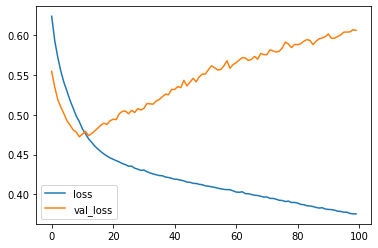

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

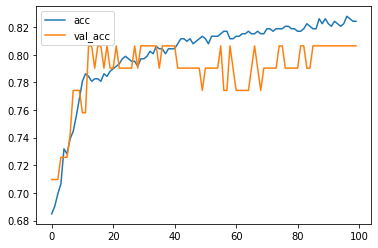

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [ ]:
#Prediction
y_pred = model.predict(X_test)

In [ ]:
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
476,1
482,0
230,1
527,0


In [ ]:
y_pred

array([[9.92635190e-01],
       [4.14814353e-02],
       [9.14240181e-02],
       [6.36542916e-01],
       [4.26397026e-02],
       [9.54586267e-03],
       [8.11280370e-01],
       [9.09829617e-01],
       [5.57677448e-01],
       [5.11681557e-01],
       [7.99820065e-01],
       [9.43374515e-01],
       [1.79720283e-01],
       [1.05536401e-01],
       [3.61807942e-01],
       [1.65159017e-01],
       [9.34967160e-01],
       [4.97034192e-03],
       [4.60308641e-01],
       [3.88582766e-01],
       [8.22795868e-01],
       [1.18736297e-01],
       [1.93412513e-01],
       [2.60458887e-01],
       [4.28304076e-03],
       [4.30896640e-01],
       [3.56900692e-03],
       [9.35745239e-01],
       [2.21195519e-02],
       [9.94562805e-02],
       [4.07376945e-01],
       [1.67336792e-01],
       [1.54488385e-02],
       [7.90273666e-01],
       [1.75703764e-02],
       [8.15574467e-01],
       [4.86527413e-01],
       [4.78020310e-03],
       [5.11779249e-01],
       [9.00613070e-01],


In [ ]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [ ]:
pred = y_pred.astype('uint8')
pred

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

# **Classification Report**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.63      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



**The accuracy of this model is 77%.**

# **Classification**

To apply various classification algorithms in the diabetes dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# **Importing the Libraries**
**numpy:** NumPy stands for numeric Python, a python pacage for the computation and processing of the multi-dimensional and single-dimensional array elements.

**pandas:** Pandas provide high-performance data manipulation in python.

**matplotlib:** Matplotlib is a library used for data visualization. It is mainly used for basic plotting

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 

In [ ]:
# Download the data
!wget -O diabetes.csv https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-19 14:45:11--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-19 14:45:12--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb2d8f0554ba01803f110568985.dl.dropboxusercontent.com/cd/0/inline/BcLNJzFsn9ids48r9mtgS_0xHFDqmLOfML0jEDjx71RAv5zP8_bCaYwP4lnAmQkb2E3F6ImSLS_yCSVvQ0JqNigMiTvypFmaZ_L4Ryjs6QlraZX9cucq6UYYvGeYkbZA_fhcximZ1uH_wEq5eqav7zvH/file# [following]
--2021-12-19 14:45:12--  https://ucb2d8f0554ba01803f110568985.dl.dropboxusercontent.com/cd/0/inline/BcLNJzFsn9ids48r9mtgS_0xHFDqmLOfML0jEDjx71RAv5zP8_bCaYwP4lnAmQkb2E3F6ImSLS_yCSVvQ0

# **Reading the Dataset**
pd.read_csv() function is used to read the data into a DataFrame

In [ ]:
#importing the dataset

dataset_diabetes_pred = pd.read_csv('diabetes.csv')
dataset_diabetes_pred

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The data have been splited into independent & dependent variable.Independent are those that we are going to used for prediction or are the features. Dependent are those that we have to predict

In [ ]:
#To split data into features and target
features = dataset_diabetes_pred[['Pregnancies'	,'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # for independent
target = dataset_diabetes_pred[['Outcome']]   # for dependent
#Feature are those variable which are used for prediction and Target is the variable that we need to predict.

In [ ]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# **To check if there is any missing data in the dataset**

As the DataFrame contains no missing data there is no need to take care of missing data.

In [ ]:
#To check missing data in the columns
#To check if there is any NaN value in the column
pd.isnull(dataset_diabetes_pred.sum)

False

# **Splitting the dataset**

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. By default Sklearn train_test_split will make random partition for the two subsets. Here train_test_split is used to split the data in 80:20 ratio i.e. 80% of the data will be used for training the model while 20% will be used for testing the model.

Parameters:

**X,y:** X is data features and Y is target

**test_size:** This is set 0.2 thus defining the test size will be 20% of the dataset.

**random_state:** it controls the shuffling applied to the data before applying the split. Setting random_state a fixed value will gurantee that the

In [ ]:
#Splitting the dataset
# Machine learning libraries
from sklearn.model_selection import train_test_split

In [ ]:
#Spliting the Dataset into Training Set and Test Set

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


# **Feature Scaling**

It is necessary because sometimes a large value in the variable can dominate the small valueFeature Scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#feature Scaling
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[98,  9],
       [18, 29]])

In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88       107
         Yes       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



From the above we can see that there are 127 correct predictions and 27 incorrect predictions.

**The accuracy is 82%.**

# **KNN Classifier**

After importing the class, the classifier obect of the class will be created.The parameter of the class is

**n_neighbors:** To define the required neighbors of the algorithm. usually,it takes 5.

**metric= 'minkowski':** This is the default parameter and it decides the distance between the points.

**p=2:** It is equivalent to the standard Euclidean metric

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[93 14]
 [17 30]]
              precision    recall  f1-score   support

          No       0.85      0.87      0.86       107
         Yes       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



From the above we can see that there are 123 correct predictions and 31 incorrect predictions.

The accuracy is 80%.

# **Support Vector Machine**

kernel = 'linear' is used when the data is linearly separable, that is , it can be seperable using a single line.

In [ ]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[98  9]
 [18 29]]
              precision    recall  f1-score   support

          No       0.84      0.92      0.88       107
         Yes       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



From the above we can see that there are 127 correct predictions and 27 incorrect predictions.

**The accuracy is 82%.**

# **Decision Tree Classifier**

After creating the classifier obeject, two main parameters are passed.

**criterion= 'entropy':** Criterion is ust used to measure the quality of split, which is calculated by information gain given by entropy.

**radom_state = 0:**For generating the same result.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[79 28]
 [17 30]]
              precision    recall  f1-score   support

          No       0.82      0.74      0.78       107
         Yes       0.52      0.64      0.57        47

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.73      0.71      0.72       154



From the above we can see that there are 109 correct predictions and 45 incorrect predictions.

**The accuracy is 71%.**

# **Random Forest**

In the code below, the classifier obect takes below parameters:

**n_estimators:** The required number of trees in the random forest. The default value is 10.

**criterion:**It is a function to analyze the accuracy of the split. Here 'entropy' is taken for the information gain

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[95 12]
 [20 27]]
              precision    recall  f1-score   support

          No       0.83      0.89      0.86       107
         Yes       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154



From the above we can see that there are 122 correct predictions and 32 incorrect predictions.

The accuracy is 79%.

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Classifier Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[93 14]
 [18 29]]
              precision    recall  f1-score   support

          No       0.84      0.87      0.85       107
         Yes       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



From the above we can see that there are 122 correct predictions and 32 incorrect predictions.

**The accuracy is 79%.**